## 13.1 라우팅이란?
- 라우팅이란 사용자가 요청한 URL에 따라 알맞은 페이지를 보여주는 것
- 여러 페이지로 구성된 웹 애플리케이션을 만들 때 페이지 별로 컴포넌트들을 분리해가면서 프로젝트를 관리하기 위해 필요한 것
- 리액트 라우터
    - 리액트 라우팅 관련 라이브러리들 중에서 가장 오래됬고, 가장 많이 사용 되고 있다.
    - 컴포넌트 기반으로 라우팅 시스템을 설정할 수 있다
- Next.js
    - 리액트 프로젝트의 프레임워크
    - 리액트 프로젝트 설정을 하는 기능, 라우팅 시스템, 최적화, 다국어 시스템지원, 서버 사이드 렌더링 등 다양한 기능 제공
    - 파일 경로 기반으로 작동

## 13.2 싱글페이지 애플리케이션이란?
- 하나의 페이지로 이루어진 애플리케이션
- Html은 한번만 받아와서 웹 애플리케이션을 실행시킨 후, 필요한 데이터만 받아서 화면에 업데이트 하는 것

## 13.3 리액트 라우터 적용 및 기본 사용법
- yarn add react-router-dom

### 프로젝트에 라우터 적용
- src/index.js에서 app을 BrowserRouter 컴포넌트로 감싼다.
- 웹 애플리케이션에 HTML5의 History API를 사용하여 페이지를 새로 불러오지 않고도 주소를 변경하고, 현재 주소의 경로에 관련 정보를 리액트 컴포넌트에서 사용할 수 있도록 해준다.

### 페이지 컴포넌트 만들기
- pages경로 home.js
    ```js
    import React from 'react';

    const Home = () => {
    return (
        <div>
        <h1>홈</h1>
        <p>홈, 그 페이지는 가장 먼저 보여지는 페이지.</p>
        </div>
    );
    };

    export default Home;
    ```
- pages/About.js
    ```js
    const About = () => {
        return (
            <div>
                <h1>소개</h1>
                <p>리액트 라우터를 사용해보는 프로젝트</p>            
            </div>
        );
    };

    export default About;
    ```
- Route 컴포넌트로 특정 경로에 원하는 컴포넌트 보여주기
    ```js
    import React from 'react';
    import { Route, Routes } from 'react-router-dom';
    import About from './pages/About';
    import Home from './pages/Home';

    const App = () => {
    return (
        <Routes>
        <Route path="/" element={<Home />} />
        <Route path="/about" element={<About />} />
        </Routes>
    );
    };

    export default App;
    ```
    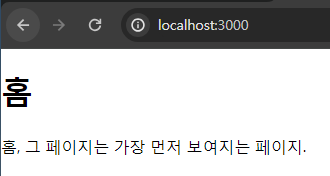

### Link 컴포넌트를 사용하여 다른 페이조 이동하는 링크 보여주기
- 웹 페이지에서는 원래 링크를 보여줄 때 a 태그를 사용하는데, 라우터를 사용하는 프로젝트에서는 a 태그를 사용하면 안된다.
- a  태그를 클릭하여 페이지를 이동할 때 브라우저에서는 페이지를 새로 불러오게 되기 때문
- Link 컴포넌트 역시 a 태그를 사용하지만, History API를 통해 브라우저 주소의 경로만 바꾸는 기능이 내장되어 있다.
    ```js
    import React from 'react';
    import { Link } from 'react-router-dom'

    const Home = () => {
    return (
        <div>
        <h1>홈</h1>
        <p>가장 먼저 보여지는 페이지.</p>
        <Link to="/about">소개</Link>
        </div>
    );
    };

    export default Home;
    ```
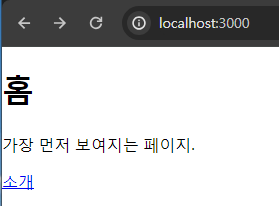 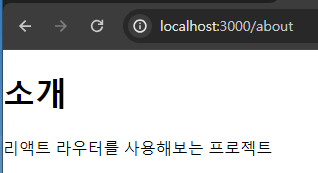

## 13.4 URL 파라미터와 쿼리스트링
- 페이지 주소를 정의할 때 유동적인 값을 사용해야 할 때가 있다.
- URL 파라미터는 주소의 경로에 유동적인 값을 넣는 형태
    - 주로 ID 또는 이름을 사용하여 특정 데이터를 조회할 때 사용
- 쿼리스트링은 주소의 뒷부분에 ? 문자열 이후에 key=value로 값을 정의하며 &로 구분하는 형태
    - 키워드 검색, 페이지네이션, 정렬 방식 등 데이터 조회에 필요한 옵션을 전달할 때 사용

### URL 파라미터
```js
import React from 'react';
import { useParams } from 'react-router-dom';

const data = {
    velopert: {
        name: '김민준',
        description: '리액트를 좋아하는 개발자'
    },
    gildong: {
        name: '홍길동',
        description: '전래동화 흥부전의 주인공'
    }
};

const Profile = () => {
    const params = useParams()
    const profile = data[params.username]

    return (
        <div>
            <h1>사용자 프로필</h1>
            {profile ? (
                <div>
                    <h2>{profile.name}</h2>
                    <p>{profile.description}</p>
                </div>
            ) : (
                <p>존재하지 않는 프로필</p>
            )}
        </div>
    );
};

export default Profile;
```
---
- App js에 <Route path="/profiles/:username" element={<Profile />} /> 추가
- Home js 수정
```js
import React from 'react';
import { Link } from 'react-router-dom'

const Home = () => {
  return (
    <div>
      <h1>홈</h1>
      <p>가장 먼저 보여지는 페이지.</p>
      <ul>
        <li>
            <Link to="/about">소개</Link>
        </li>
        <li>
            <Link to="/profiles/velopert">velopert의 프로필</Link>
        </li>
        <li>
            <Link to="/profiles/gildong">gildong의 프로필</Link>
        </li>
        <li>
            <Link to="/profiles/void">void의 프로필</Link>
        </li>
      </ul>
    </div>
  );
};

export default Home;
```
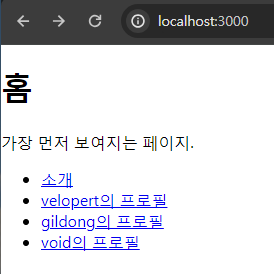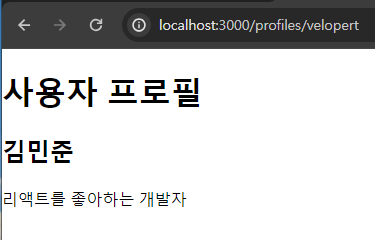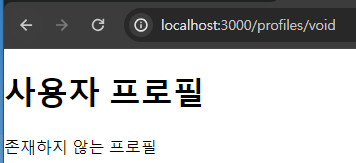

### 쿼리스트링
- About.js 수정
    - useLocation Hook사용
    - location 객체를 반환
    - pathname : 현재 주소 경로,  search : 맨 앞의 ? 문자를 포함한 쿼리스트링 값
    - hash : 주소의 # 문자열 뒤의 값, state : 페이지로 이동할 때 임의로 넣을 수 있는 상태 값
    - key : location 객체의 고유값, 초기에는 default이며 페이지가 변경될 때마다 고유값 생성
    - 주소창에 http://localhost:3000/about?detail=true&mode=1
```js
import { useLocation } from "react-router-dom";

const About = () => {
    const location = useLocation()

    return (
        <div>
            <h1>소개</h1>
            <p>리액트 라우터를 사용해보는 프로젝트</p>
            <p>쿼리스트링: {location.search}</p>        
        </div>
    );
};

export default About;
```
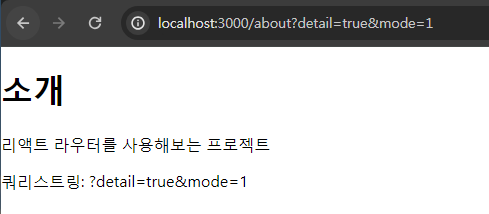

- 쿼리스트링 값이 현재 ?detail=true&mode=1로 표시
- 파싱 작업 필요, useSearchParams Hook 사용해 파싱
    ```js
    import { useSearchParams } from 'react-router-dom'

    const About = () => {
        const [searchParams, setSearchParams] = useSearchParams()
        const detail = searchParams.get('detail')
        const mode = searchParams.get('mode')

        const onToggleDetail = () => {
            setSearchParams({mode, detail:detail === 'true' ? false : true})
        }

        const onIncreaseMode = () => {
            const nextMode = mode === null ? 1 : parseInt(mode) + 1
            setSearchParams({mode:nextMode, detail})
        }

        return (
            <div>
                <h1>소개</h1>
                <p>리액트 라우터를 사용해보는 프로젝트</p>
                <p>detail:{detail}</p>
                <p>mode: {mode}</p>
                <button onClick={onToggleDetail}>Toggle detail</button>
                <button onClick={onIncreaseMode}>mode</button>
            </div>
        );
    };

    export default About;
    ```

## 13.5 중첩된 라우트
- Articles.js
    ```js
    import React from 'react';
    import { Link } from 'react-router-dom';

    const Articles = () => {
        return (
            <ul>
                <li>
                    <Link to="/articles/1">게시글 1</Link>
                </li>
                <li>
                    <Link to="/articles/2">게시글 2</Link>
                </li>
                <li>
                    <Link to="/articles/3">게시글 3</Link>
                </li>
            </ul>
        );
    };

    export default Articles;
    ```
- article.js
    ```js
    import React from 'react';
    import { useParams } from 'react-router-dom';

    const Article = () => {
        const {id} = useParams()

        return (
            <div>
                <h2>게시글 {id}</h2>   
            </div>
        );
    };

    export default Article;
    ```
- app.js
    ```js
    import React from 'react';
    import { Route, Routes } from 'react-router-dom';
    import About from './pages/About';
    import Home from './pages/Home';
    import Profile from './pages/Profile';
    import Article from './pages/Article';
    import Articles from './pages/Articles';

    const App = () => {
    return (
        <Routes>
        <Route path="/" element={<Home />} />
        <Route path="/about" element={<About />} />
        <Route path="/profiles/:username" element={<Profile />} />
        <Route path="/articles" element={<Articles />} />
        <Route path="/articles/:id" element={<Article />} />
        </Routes>
    );
    };

    export default App;
    ```
#### 중첩된 라우트를 사용하면 더 나은 방식으로 구현 가능 중첩된 라우트 형태로 라우트 설정
- app.js
    ```js
    import React from 'react';
    import { Route, Routes } from 'react-router-dom';
    import About from './pages/About';
    import Home from './pages/Home';
    import Profile from './pages/Profile';
    import Article from './pages/Article';
    import Articles from './pages/Articles';

    const App = () => {
    return (
        <Routes>
        <Route path="/" element={<Home />} />
        <Route path="/about" element={<About />} />
        <Route path="/profiles/:username" element={<Profile />} />
        <Route path="/articles" element={<Articles />}>
            <Route path=':id' element={<Article />} />
        </Route>
        
        </Routes>
    );
    };

    export default App;
    ```
- Articles 수정
    ```js
    import React from 'react';
    import { Link, Outlet } from 'react-router-dom';

    const Articles = () => {
        return (
            <div>
                <Outlet />
                <ul>
                    <li>
                        <Link to="/articles/1">게시글 1</Link>
                    </li>
                    <li>
                        <Link to="/articles/2">게시글 2</Link>
                    </li>
                    <li>
                        <Link to="/articles/3">게시글 3</Link>
                    </li>
                </ul>
            </div>
        );
    };

    export default Articles;
    ```
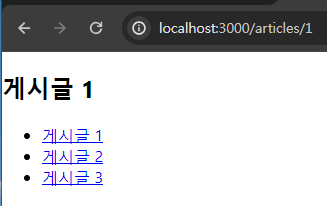

#### 공통 레이아웃 컴포넌트
- 중첩된 라우트와 Outlet은 페이지끼리 공통적으로 보여줘야 하는레이아웃이 있을 때 유용하게 사용
- layout.js
    ```js
    import { Outlet } from "react-router-dom";

    const Layout = () => {
        return (
            <div>
                <header style={{ background:'lightgray', padding:16, fontSize:24}}>
                    header    
                </header> 
                <main>
                    <Outlet />
                </main>           
            </div>
        );
    };

    export default Layout;
    ```
- app.js
    ```js
    import React from 'react';
    import { Route, Routes } from 'react-router-dom';
    import About from './pages/About';
    import Home from './pages/Home';
    import Profile from './pages/Profile';
    import Article from './pages/Article';
    import Articles from './pages/Articles';
    import Layout from './Layout';

    const App = () => {
    return (
        <Routes>
        <Route element={<Layout />}>
            <Route path="/" element={<Home />} />
            <Route path="/about" element={<About />} />
            <Route path="/profiles/:username" element={<Profile />} />
        </Route>
        <Route path="/articles" element={<Articles />}>
            <Route path=':id' element={<Article />} />
        </Route>
        
        </Routes>
    );
    };

    export default App;
    ```
    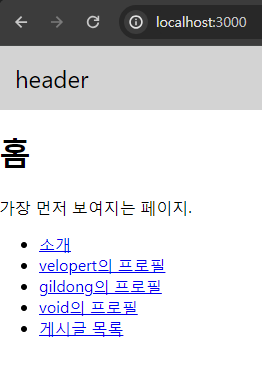

#### index props
- Route 컴포넌트에는 index props 존재
- path="/"와 동일한 의미를 갖는다.
- app.js 수정
    ```js
    import React from 'react';
    import { Route, Routes } from 'react-router-dom';
    import About from './pages/About';
    import Home from './pages/Home';
    import Profile from './pages/Profile';
    import Article from './pages/Article';
    import Articles from './pages/Articles';
    import Layout from './Layout';

    const App = () => {
    return (
        <Routes>
        <Route element={<Layout />}>
            <Route index element={<Home />} />
            <Route path="/about" element={<About />} />
            <Route path="/profiles/:username" element={<Profile />} />
        </Route>
        <Route path="/articles" element={<Articles />}>
            <Route path=':id' element={<Article />} />
        </Route>
        
        </Routes>
    );
    };

    export default App;
    ```
    - 여전히 잘 작동
    - index를 사용하면 상위 라우트의 경로와 일치하지만, 그 이후 경로가 주어지지 않았을 때 보여지는 라우트를 설정할 수 있다.
    - path="/"와 동일한 역할을 하며 좀 더 명시적으로 표현하는 방법이다.

## 13.6 리액트 라우터 부가 기능

### useNavigate
- Link 컴포넌트를 사용하지 않고 다른 페이지로 이동해야 하는 상황에 사용하는 Hook
```js
import { Outlet, useNavigate } from "react-router-dom";

const Layout = () => {
    const navigate = useNavigate()

    const goBack = () => {
        // 이전 페이지 이동
        navigate(-1)
    }

    const goArticles = () => {
        // articles 경로 이동
        navigate('/articles', {replace:true})
    }
    return (
        <div>
            <header style={{ background:'lightgray', padding:16, fontSize:24}}>
                <button onClick={goBack}>뒤로가기</button>
                <button onClick={goArticles}>게시글 목록</button>
            </header> 
            <main>
                <Outlet />
            </main>           
        </div>
    );
};

export default Layout;
```
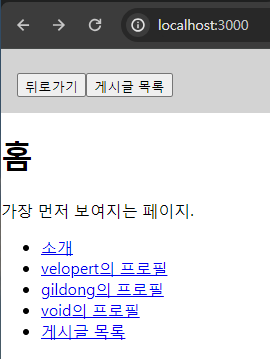

### NavLink
- 링크에서 사용하는 경로가 현재 라우트의 경로와 일치하는 경우 특정 스타일 또는 CSS 클래스를 적용하는 컴포넌트
    ```js
    import React from 'react';
    import { Outlet, NavLink } from 'react-router-dom';

    const Articles = () => {
        return (
            <div>
                <Outlet/>
                <ul>
                    <ArticleItem id={1} />
                    <ArticleItem id={2} />
                    <ArticleItem id={3} />
                </ul>
            </div>
        );
    };

    const ArticleItem = ({id}) => {
        const activeStyle = {
            color:'green',
            fontSize:21,
        }
        return(
            <li>
                <NavLink
                    to={`articles/${id}`}
                    style={({isActive})=>(isActive ? activeStyle : undefined)}
                >
                    게시글 {id}
                </NavLink>
            </li>
        )
    }

    export default Articles;
    ```
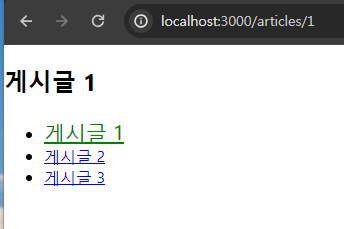

### NotFound
- 사전에 정의되지 않는 경로에 사용자가 진입했을 때 보여주는 페이지
- 페이지를 찾을 수 없을 때 나타나는 페이지
    ```js
    const NotFound = () => {
        return (
            <div
                style={{
                    display:"flex",
                    alignItems:"center",
                    justifyContent:"center",
                    fontSize:64,
                    position:'absolute',
                    width:'100%',
                    height:'100%',
                }}
            >
                404
            </div>
        );
    };

    export default NotFound;
    ```
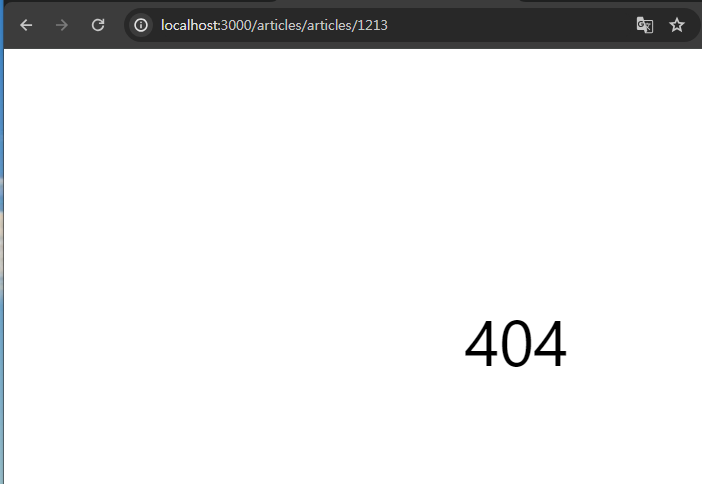
### Navigate
- 컴포넌트를 화면에 보여주는 순간 다른 페이지로 이동을 하고 싶을 때 사용하는 컴포넌트
- 페이지를 리다이렉트 하고 싶을 때 사용
```js
const Login = () => {
    return <div>로그인 페이지</div>
}
export default Login;
```
---
```js
import { Navigate } from "react-router-dom";

const MyPage = () => {
    const isLoggedIn = false

    if (!isLoggedIn){
        return <Navigate to="/login" replace={true}/>
    }

    return <div>마이페이지</div>
};

export default MyPage;
```
- 부라우저 주소창에 /mypage 경로를 직접 입력하면 로딩되는 순간 바로 Login 페이지로 이동 된다
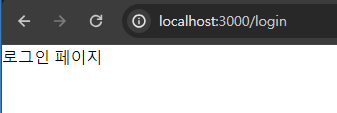


## 13.7 정리
- 리액트 라우터를 사용하여 주소 경로에 따라 다양한 페이지를 보여 주는 방법을 배웠다